## Predicción de costo en accidentes automovilísticos

El ejercicio consiste en predecir el coste de un incidente de automovilístico en base al número de autos que se han visto afectados. El conjunto de datos es generado de manera aleatoria.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LinearRegression


#### Generación del conjunto de datos


In [17]:
# Número de autos afectados
X = 3 * np.random.rand(200, 1)

# Coste del accidente
y = 7 + 2 * X + np.random.rand(200, 1)

#### Visiualización del conjunto de datos

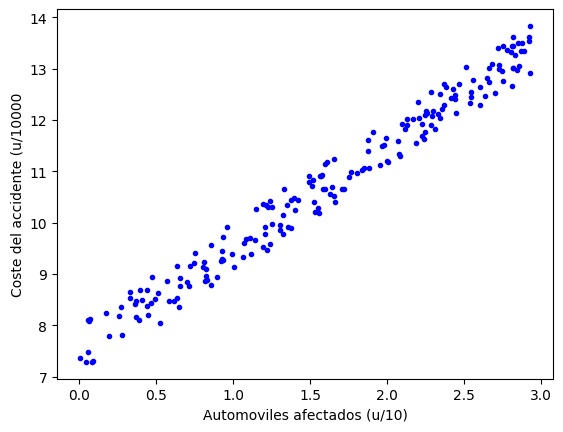

In [28]:
plt.plot(X, y, 'b.')
plt.xlabel('Automoviles afectados (u/10)')
plt.ylabel('Coste del accidente (u/10000')
plt.show()

#### Modificación del conjunto de datos

In [29]:
data = { 'n_automoviles_afectados': X.flatten(), 'coste': y.flatten() }
df = pd.DataFrame(data)
df.head(10)

,n_automoviles_afectados,coste
0,1.977818,11.520035
1,0.826213,9.092279
2,1.007912,9.137353
3,2.747864,12.960534
4,2.467266,12.704087
5,2.291909,12.078560
6,1.569732,10.905539
7,1.573578,10.931535
8,1.838068,11.023207
9,1.224158,10.299969


In [30]:
# Escalado del número de automoviles afectados
df['n_automoviles_afectados'] = df['n_automoviles_afectados'] * 10
df['n_automoviles_afectados'] = df['n_automoviles_afectados'].astype('int')

# Escalado del coste
df['coste'] = df['coste'] * 10000
df['coste'] = df['coste'].astype('int')
df.head(10)

,n_automoviles_afectados,coste
0,19,115200
1,8,90922
2,10,91373
3,27,129605
4,24,127040
5,22,120785
6,15,109055
7,15,109315
8,18,110232
9,12,102999


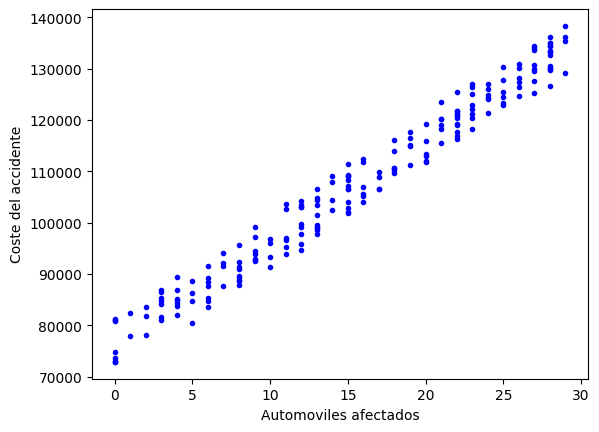

In [31]:
# Representación gráfica del conjunto de datos
plt.plot(df['n_automoviles_afectados'], df['coste'], 'b.')
plt.xlabel('Automoviles afectados')
plt.ylabel('Coste del accidente')
plt.show()

#### Construcción del modelo

In [32]:
# Construcción del modelo y ajuste de la función hipótesis
lin_reg = LinearRegression()

# Entrenar el algoritmo
lin_reg.fit(df['n_automoviles_afectados'].values.reshape(-1, 1), df['coste'].values)

LinearRegression()

In [33]:
# Parámetro theta 0
lin_reg.intercept_

76273.27516073082

In [34]:
# Parámetro theta 1
lin_reg.coef_

array([1996.37519143])

In [35]:
# Preddición para el valor mínimo y máximo del conjunto de los datos de entrenamiento

X_min_max = np.array([[df['n_automoviles_afectados'].min()], [df['n_automoviles_afectados'].max()]])
y_train_pred = lin_reg.predict(X_min_max)
print(y_train_pred)

[ 76273.27516073 134168.15571216]


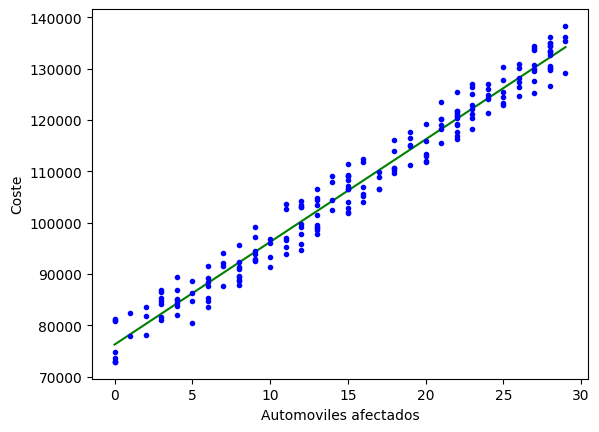

In [36]:
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_automoviles_afectados'], df['coste'], 'b.')
plt.xlabel('Automoviles afectados')
plt.ylabel('Coste')
plt.show()

#### Predicción de nuevos ejemplos

In [37]:
x_new = np.array([[15]]) # 15 automoviles afectados

# Predicción del coste que tendría el accidente
coste = lin_reg.predict(x_new)
print(int(coste[0]))

106218


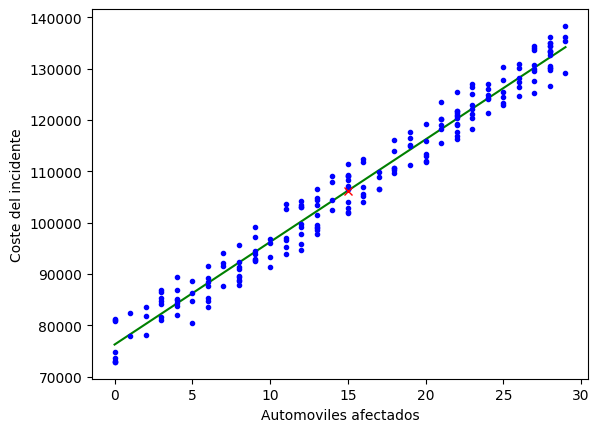

In [40]:
plt.plot(X_min_max, y_train_pred, 'g-')
plt.plot(df['n_automoviles_afectados'], df['coste'], 'b.')
plt.plot(x_new, coste, 'rx')
plt.xlabel('Automoviles afectados')
plt.ylabel('Coste del incidente')
plt.show()